In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_excel('results_cox_reg.xlsx')
mrna = pd.read_excel('results_cox_reg.xlsx', sheet_name='mrna', header = None)
meth = pd.read_excel('results_cox_reg.xlsx', sheet_name='meth', header = None)
mirna = pd.read_excel('results_cox_reg.xlsx', sheet_name='mirna', header = None)
mrna_meth = pd.read_excel('results_cox_reg.xlsx', sheet_name='mrna_meth_d1', header = None)
mrna_meth = pd.read_excel('results_cox_reg.xlsx', sheet_name='mrna_meth_d2', header = None)
mrna_meth_mirna = pd.read_excel('results_cox_reg.xlsx', sheet_name='mrna_meth_mirna', header = None)

In [3]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [33]:
box_data = {}
box_data['mrna'] = {}
box_data['meth'] = {}
box_data['mirna'] = {}
box_data['mrna_meth'] = {}
box_data['mrna_meth_mirna'] = {}

for key, value in box_data.items():
    if key == 'mrna':
        value['Train'] = mrna[0]
        value['Test'] = mrna[1]
    if key == 'meth':
        value['Train'] = meth[0]
        value['Test'] = meth[1]
    if key == 'mirna':
        value['Train'] = mirna[0]
        value['Test'] = mirna[1]
    if key == 'mrna_meth':
        value['Train'] = mrna_meth[0]
        value['Test'] = mrna_meth[1]
    if key == 'mrna_meth_mirna':
        value['Train'] = mrna_meth_mirna[0]
        value['Test'] = mrna_meth_mirna[1]


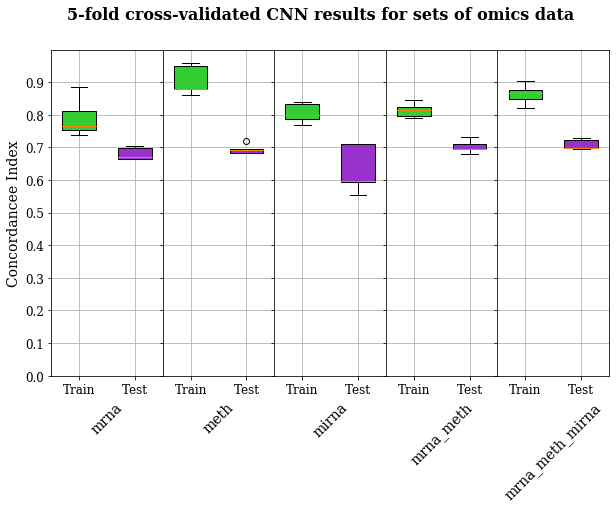

In [91]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(10,6))
fig.subplots_adjust(wspace=0)
fig.suptitle('5-fold cross-validated CNN results for sets of omics data',fontweight = 'bold',  fontsize=16)

axes[0].set_ylabel('Concordancee Index', fontsize = 14)

for ax, name in zip(axes, ['mrna', 'meth', 'mirna', 'mrna_meth', 'mrna_meth_mirna']):
    box = ax.boxplot([box_data[name][item] for item in ['Train', 'Test']], widths = 0.6, patch_artist = True)
    colors = ['limegreen', 'darkorchid']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    ax.set(xticklabels=['Train', 'Test'])
    ax.margins(0.05)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12) 
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.grid()
    ax.set_ylim([0,1])
    ax.set_xlabel(name, fontsize = 14, rotation = 45)
plt.show()
fig.savefig('Concordance_boxplot.png', format = 'png', dpi = 1200, bbox_inches='tight')